In [ ]:
# default_exp core

# dependencygraph

> Find the DAG of related components.

In [ ]:
#hide
from nbdev.showdoc import *


In [ ]:
#export
import networkx as nx
import matplotlib.pyplot as plt
from random import seed, random
import itertools


In [ ]:
#hide
%matplotlib notebook

In [ ]:
#export
datasourceNodes = ['Table_' + f'{i:02}' for i in range(0,6)]
modelNodes = ['Model_' + i for i in map(chr, range(ord('A'), ord('D')+1))]
stakeholderNodes = ['Stkh_' + f'{i:02}' for i in range(0,4)]

In [ ]:
nodesDict = {'datasource' : datasourceNodes,
            'model': modelNodes,
            'stakeholder': stakeholderNodes}

In [ ]:
#export
nodesDict = {0: datasourceNodes,
             1 : modelNodes,
             2: stakeholderNodes}

In [ ]:
#export
G = nx.Graph()

In [ ]:
#export
for k,v in nodesDict.items():
    for node in v:
        G.add_node(node, role=k)

In [ ]:
seed(1234)

In [ ]:
random()

0.9664535356921388

In [ ]:
#export
for i in nodesDict[0]:
    for j in nodesDict[1]:
        if random() <= 0.25:
            G.add_edge(i,j, relation='tableInput')
        
 
for i in nodesDict[1]:
    for j in nodesDict[2]:
        if random() <= 0.4:
            G.add_edge(i,j, relation='modelConsumer')     

<IPython.core.display.Javascript object>


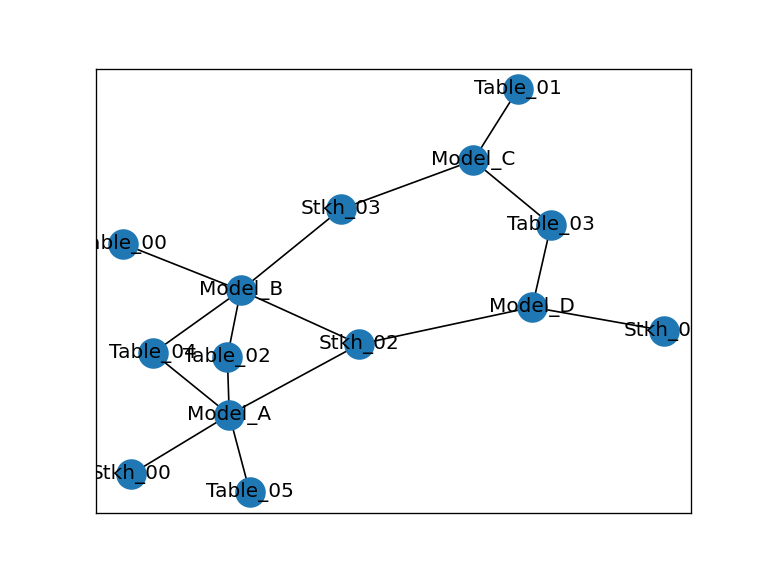

In [ ]:
#export
nx.draw_networkx(G, with_labels=True)

In [ ]:
#export
pos = nx.multipartite_layout(G, subset_key="role")
color = list(itertools.chain(itertools.repeat('gold', len(datasourceNodes)), 
                             itertools.repeat('violet', len(modelNodes)),
                             itertools.repeat('limegreen', len(stakeholderNodes)),
                            ))

<IPython.core.display.Javascript object>


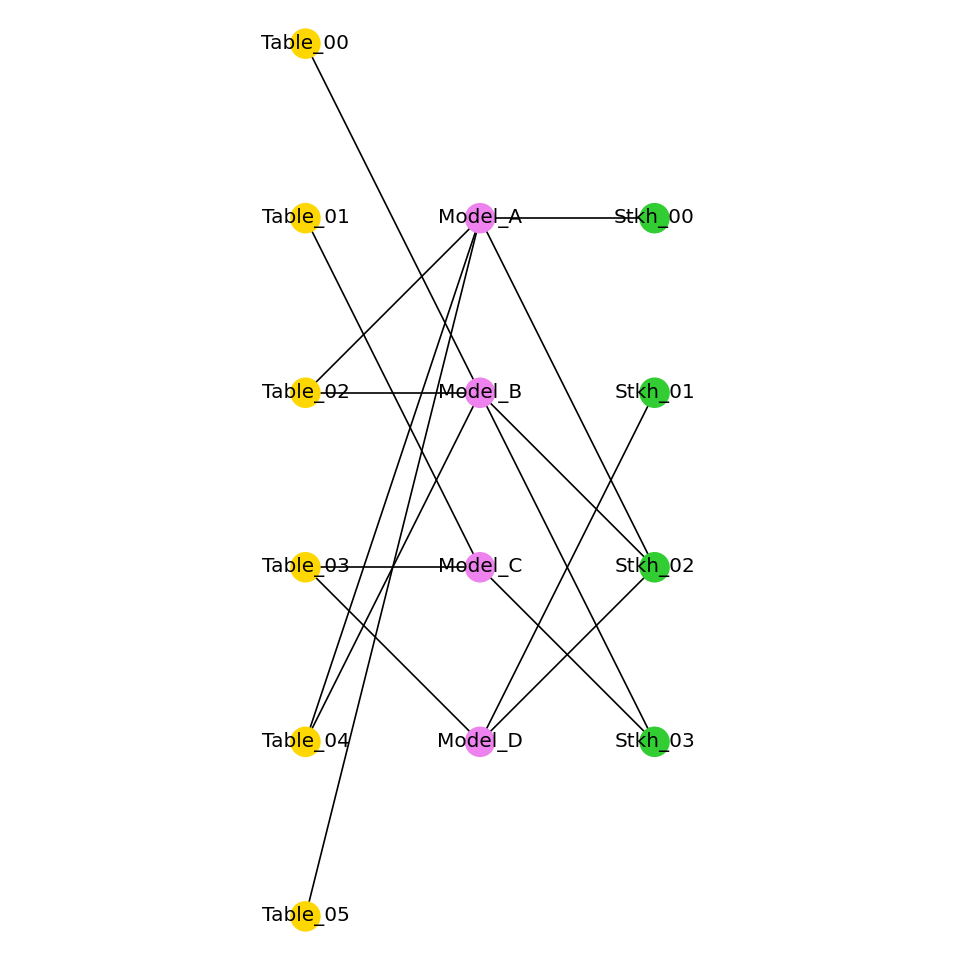

In [ ]:
#export
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=color,with_labels=True)
plt.axis("equal")
plt.show()